In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

In [9]:
sirenlocations = gpd.read_file('../data/sirenlocations.geojson')
print(sirenlocations.crs)
sirenlocations.head(8)

EPSG:4326


,city,zip,land_use_description,radius,site_name,address,siren,mounted_height,geometry
0,NASHVILLE,37201,VACANT COMMERCIAL LAND,4400,Woodland St & Gay St,0 1ST AVE N,Eclipse 8,50,POINT (-86.77698 36.16654)
1,NASHVILLE,37203,PARK OR RECREATION,14700,Watkins Park,616 17TH AVE N,508,50,POINT (-86.79982 36.16229)
2,WHITES CREEK,37189,SCHOOL OR COLLEGE,4400,Alex Green Elementary,3921 LLOYD RD,Eclipse 8,50,POINT (-86.83165 36.25259)
3,ANTIOCH,37013,STRIP SHOPPING CENTER,4400,Bell Road @ Bell Forge Rd,5432 BELL FORGE LN E,Eclipse 8,50,POINT (-86.64660 36.05049)
4,NASHVILLE,37221,SCHOOL OR COLLEGE,14700,Bellevue Middle School,655 COLICE JEANNE RD,508,50,POINT (-86.93376 36.06935)
5,NASHVILLE,37207,PARK OR RECREATION,4400,Cleveland Park,927 N 6TH ST,Eclipse 8,50,POINT (-86.76129 36.18718)
6,NASHVILLE,37204,PARK OR RECREATION,4400,Sevier Park,3021 LEALAND LN,Eclipse 8,50,POINT (-86.78851 36.11924)
7,NASHVILLE,37211,SCHOOL OR COLLEGE,4400,McMurray Middle School,520 MCMURRAY DR,Eclipse 8,50,POINT (-86.72284 36.05733)


sirenlocations.loc[0,'geometry' ]

In [11]:
print(sirenlocations.loc[0,'geometry'])

POINT (-86.776981 36.166543)


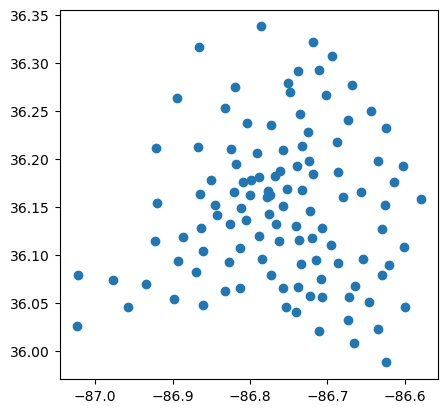

In [13]:
sirenlocations.plot();

In [19]:
sirenlocations.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [26]:
sirenlocations.i

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   city                  113 non-null    object  
 1   zip                   111 non-null    object  
 2   land_use_description  113 non-null    object  
 3   radius                113 non-null    object  
 4   site_name             113 non-null    object  
 5   address               113 non-null    object  
 6   siren                 113 non-null    object  
 7   mounted_height        113 non-null    object  
 8   geometry              113 non-null    geometry
dtypes: geometry(1), object(8)
memory usage: 8.1+ KB


In [37]:
result=sirenlocations['geometry'].str.strip('()')                               \
                   .str.split(', ', expand=True)                   \
                   .rename(columns={0:'Lat', 1:'Lng'})

AttributeError: Can only use .str accessor with string values!

In [15]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head(8)

EPSG:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."
5,37143,23,PEGRAM,7047.8267580476522,1900364.756652832,"MULTIPOLYGON (((-87.03553 36.08659, -87.03556 ..."
6,37080,42,JOELTON,2319.8074237329579,56522.611450195313,"MULTIPOLYGON (((-86.86263 36.37811, -86.86264 ..."
7,37221,17,NASHVILLE,241372.3112694624,1266395059.4877319,"MULTIPOLYGON (((-86.97084 36.11644, -86.97084 ..."


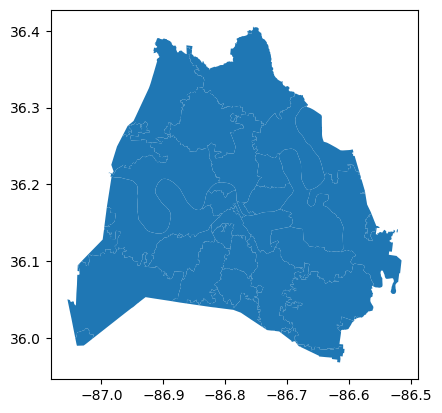

In [16]:
zipcodes.plot();

TypeError: Legend.__init__() got an unexpected keyword argument 'bbox_to_ancher'

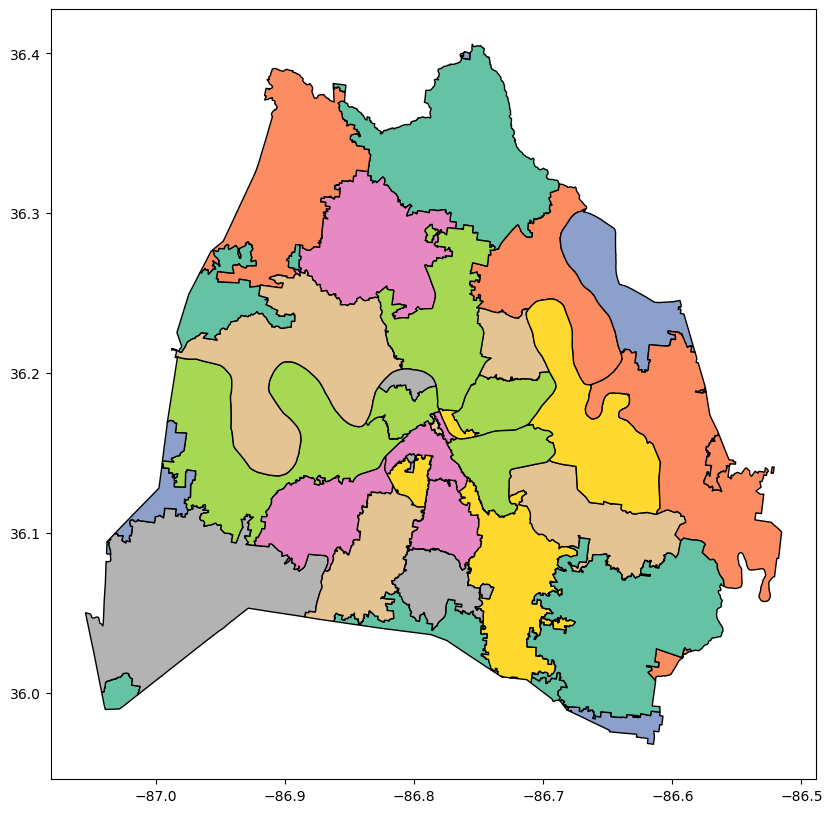

In [17]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 'bbox_to_ancher': (1, 1.03), 'ncol':2}

zipcodes.plot(column = 'zip', figsize = (10, 10), 
              edgecolor = 'black' ,
              legend = True, legend_kwds = leg_kwds,
              cmap = 'Set2')
plt.show()

In [18]:
zipcodes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [38]:
sirenlocations_geo = gpd.GeoDataFrame(sirenlocations,
                                      crs = zipcodes.crs,
                                      geometry = gpd.points_from_xy(sirenlocations['geometry'].x,sirenlocations['geometry'].y)) 

In [ ]:
sirenlocations.info()

In [39]:
zipcodes = zipcodes [['zip', 'po_name', 'geometry']]

In [40]:
sirens_by_zip = gpd.sjoin(sirenlocations_geo, zipcodes, predicate = 'within')

In [41]:
sirens_by_zip.head()

,city,zip_left,land_use_description,radius,site_name,address,siren,mounted_height,geometry,index_right,zip_right,po_name
0,NASHVILLE,37201,VACANT COMMERCIAL LAND,4400,Woodland St & Gay St,0 1ST AVE N,Eclipse 8,50,POINT (-86.77698 36.16654),36,37201,NASHVILLE
59,NASHVILLE,37201,PARK OR RECREATION,4400,Riverfront Park,100 1ST AVE S,Eclipse 8,50,POINT (-86.77394 36.16219),36,37201,NASHVILLE
1,NASHVILLE,37203,PARK OR RECREATION,14700,Watkins Park,616 17TH AVE N,508,50,POINT (-86.79982 36.16229),35,37203,NASHVILLE
14,NASHVILLE,37203,PARK OR RECREATION,4400,Fort Negley,534 CHESTNUT ST,Eclipse 8,50,POINT (-86.77574 36.14276),35,37203,NASHVILLE
38,NASHVILLE,37203,PARK OR RECREATION,4400,Centennial Park,2500 WEST END AVE,Eclipse 8,50,POINT (-86.81192 36.14885),35,37203,NASHVILLE


In [43]:
sirens_by_zip['zip_left'].value_counts()

zip_left
37013    9
37211    9
37207    8
37214    6
37203    5
37217    5
37215    5
37076    5
37209    5
37205    5
37072    4
37115    4
37218    4
37206    4
37221    4
37210    4
37138    3
37216    3
37204    3
37208    3
37220    3
37027    2
37201    2
37189    2
37080    1
37015    1
37228    1
37212    1
Name: count, dtype: int64

In [44]:
sirens_in_37013 = sirens_by_zip.loc[sirens_by_zip['zip_left'] == '37013']
sirens_in_37013.shape

(9, 12)

In [46]:
polygon37013 = zipcodes.loc[zipcodes['zip'] == '37013']
polygon37013.shape

(1, 3)

KeyError: 'route'

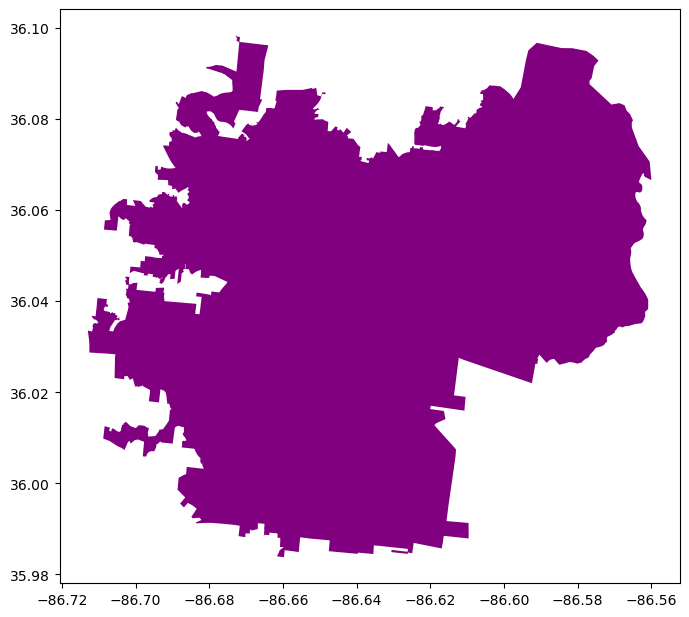

In [48]:
ax = polygon37013.plot(figsize = (8,10), color = 'purple')
sirens_in_37013.plot (ax = ax, column = 'route');
plt.show();